## Partie 1: collecte et préparation des données 

In [ ]:
#pip install yfinance  pandas matplotlib

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

### Collecte des données

In [24]:
# Données historiques du S&P 500
sp500 = yf.download('^GSPC', start='2018-01-01', end='2023-12-31', interval='1d')

# Garder uniquement le volume et l'indice de cloture
sp500_indice = sp500[['Close', 'Volume']]
sp500_indice.reset_index(inplace=True)

sp500_indice


[*********************100%%**********************]  1 of 1 completed


,Date,Close,Volume
0,2018-01-02,2695.810059,3397430000
1,2018-01-03,2713.060059,3544030000
2,2018-01-04,2723.989990,3697340000
3,2018-01-05,2743.149902,3239280000
4,2018-01-08,2747.709961,3246160000
...,...,...,...
1504,2023-12-22,4754.629883,3046770000
1505,2023-12-26,4774.750000,2513910000
1506,2023-12-27,4781.580078,2748450000
1507,2023-12-28,4783.350098,2698860000


In [25]:
# Données historiques des taux d'intérets
tnx = yf.download('^TNX', start='2018-01-01', end='2023-12-31', interval='1d')

# Garder uniquement la valeur de cloture
sp500_indice['yield'] = tnx.reset_index()['Close']

sp500_indice.head()

[*********************100%%**********************]  1 of 1 completed
C:\Users\ludo1\AppData\Local\Temp\ipykernel_16836\819812789.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sp500_indice['yield'] = tnx.reset_index()['Close']


,Date,Close,Volume,yield
0,2018-01-02,2695.810059,3397430000,2.465
1,2018-01-03,2713.060059,3544030000,2.447
2,2018-01-04,2723.989990,3697340000,2.453
3,2018-01-05,2743.149902,3239280000,2.476
4,2018-01-08,2747.709961,3246160000,2.480


In [26]:
# Données historiques du VIX
vix = yf.download('^VIX', start='2018-01-01', end='2023-12-31', interval='1d')

# Garder uniquement la valeur de cloture
sp500_indice['vix'] = vix.reset_index()['Close']

sp500_indice.head()

[*********************100%%**********************]  1 of 1 completed
C:\Users\ludo1\AppData\Local\Temp\ipykernel_16836\1300866228.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sp500_indice['vix'] = vix.reset_index()['Close']


,Date,Close,Volume,yield,vix
0,2018-01-02,2695.810059,3397430000,2.465,9.77
1,2018-01-03,2713.060059,3544030000,2.447,9.15
2,2018-01-04,2723.989990,3697340000,2.453,9.22
3,2018-01-05,2743.149902,3239280000,2.476,9.22
4,2018-01-08,2747.709961,3246160000,2.480,9.52


In [27]:
sp500_indice.shape

(1509, 5)

In [28]:
# récupération des tickers pour les 30 plus grandes entreprises
sp_top_30=pd.read_csv('SP500_Top_30_Tickers.csv')
sp_top_30.head()

,Company,Ticker
0,Microsoft,MSFT
1,Apple,AAPL
2,Amazon,AMZN
3,Alphabet (Google),GOOGL
4,Facebook (Meta),META


In [29]:
sp_tickers=sp_top_30['Ticker']

In [30]:
# Initialiser un dictionnaire pour stocker les données
all_data = {}

# Télécharger les données pour chaque entreprise
for ticker in sp_tickers:
    try:
        data = yf.download(ticker, start='2018-01-01', end='2023-12-31', interval='1d')
        all_data[ticker] = data
    except Exception as e:
        print(f"Erreur avec {ticker}: {e}")


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['BRK.B']: YFTzMissingError('$%ticker%: possibly delisted; No timezone found')
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[***

In [31]:
#Par exemple:

all_data['MSFT']

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,86.129997,86.309998,85.500000,85.949997,79.792900,22483800
2018-01-03,86.059998,86.510002,85.970001,86.349998,80.164268,26061400
2018-01-04,86.589996,87.660004,86.570000,87.110001,80.869820,21912000
2018-01-05,87.660004,88.410004,87.430000,88.190002,81.872444,23407100
2018-01-08,88.199997,88.580002,87.599998,88.279999,81.955986,22113000
...,...,...,...,...,...,...
2023-12-22,373.679993,375.179993,372.709991,374.579987,372.543915,17091100
2023-12-26,375.000000,376.940002,373.500000,374.660004,372.623505,12673100
2023-12-27,373.690002,375.059998,372.809998,374.070007,372.036713,14905400


### Prétraitement des données

In [32]:
#Vérifier si des données manquent

# Créer un dictionnaire
missing_values_per_company = {}

# Parcourir chaque entreprise dans all_data
for company, data in all_data.items():
    # Calculer le nombre total de valeurs manquantes dans le DataFrame
    total_missing = data.isnull().sum().sum()

    # Stocker le résultat dans le dictionnaire
    missing_values_per_company[company] = total_missing

# Afficher les résultats
if all(count == 0 for count in missing_values_per_company.values()):
    print("Aucune donnée manquante")
else:
    for company, missing_count in missing_values_per_company.items():
        if missing_count != 0:
            print(f"Entreprise: {company}, Valeurs manquantes: {missing_count}")

Aucune donnée manquante


In [33]:
# Vérifier si toutes les entreprises n'ont pas de doublons

if all(data[data.duplicated()].empty for data in all_data.values()):
    print("Aucun doublon trouvé")
else:
    for company, data in all_data.items():
        # Identifier les lignes dupliquées en utilisant duplicated()
        duplicates = data[data.duplicated()]

        # Afficher les doublons pour l'entreprise actuelle
        if not duplicates.empty:
            print(f"Doublons pour {company}:\n{duplicates}\n")

Aucun doublon trouvé


### Création de la table globale

In [34]:
# Créer une liste pour stocker les DataFrames individuels
all_company_data = []

# Parcourir chaque entreprise dans all_data
for company, data in all_data.items():
    # Sélectionner les colonnes 'Date', 'Close' et 'Volume'
    company_data = data[['Close', 'Volume']].copy()  # Copier pour éviter des avertissements

    # Renommer les colonnes pour inclure le nom de l'entreprise
    company_data.rename(
        columns={
            'Close': f"{company}_Close",
            'Volume': f"{company}_Volume",
        },
        inplace=True,
    )

    # Réinitialiser l'index pour avoir la date comme colonne
    company_data.reset_index(inplace=True)

    # Ajouter le DataFrame à la liste
    all_company_data.append(company_data)

# Fusionner tous les DataFrames en un seul
final_df = pd.concat(all_company_data, axis=1)

# Supprimer les colonnes de date dupliquées (en gardant la première)
sp500_Top_30= final_df.loc[:, ~final_df.columns.duplicated()]

sp500_Top_30.head()

,Date,MSFT_Close,MSFT_Volume,AAPL_Close,AAPL_Volume,AMZN_Close,AMZN_Volume,GOOGL_Close,GOOGL_Volume,META_Close,...,CMCSA_Close,CMCSA_Volume,PEP_Close,PEP_Volume,WFC_Close,WFC_Volume,BA_Close,BA_Volume,ADBE_Close,ADBE_Volume
0,2018-01-02,85.949997,22483800,43.064999,102223600,59.450500,53890000,53.660500,31766000,181.419998,...,41.070000,18270300,118.059998,4165800,61.090000,13819300,296.839996,2978900,177.699997,2432800
1,2018-01-03,86.349998,26061400,43.057499,118071600,60.209999,62176000,54.576000,31318000,184.669998,...,40.410000,21062900,117.750000,4224000,61.560001,14203700,297.799988,3211200,181.039993,2561200
2,2018-01-04,87.110001,21912000,43.257500,89738400,60.479500,60442000,54.787998,26052000,184.330002,...,40.669998,18143800,118.330002,3147000,62.330002,18740500,296.670013,4171700,183.220001,2211400
3,2018-01-05,88.190002,23407100,43.750000,94640000,61.457001,70894000,55.514500,30250000,186.850006,...,41.040001,17007500,118.669998,2714200,62.750000,14217900,308.839996,6177700,185.339996,2376500
4,2018-01-08,88.279999,22113000,43.587502,82271200,62.343498,85590000,55.710499,24644000,188.279999,...,40.480000,15189500,117.989998,5730400,62.040001,15569400,310.149994,4124900,185.039993,2088000


In [35]:
# Instead of resetting the index, drop the 'level_0' and 'index' columns if they exist
if 'level_0' in sp500_indice.columns:
    sp500_indice = sp500_indice.drop(columns=['level_0'])
if 'index' in sp500_indice.columns:
    sp500_indice = sp500_indice.drop(columns=['index'])
# Now you can safely reset the index if needed
sp500_indice = sp500_indice.reset_index() #If you need a new index

# Now proceed with the merge
merged_df = pd.merge(sp500_indice, sp500_Top_30, on='Date')
# Afficher le DataFrame fusionné
merged_df= merged_df.drop(columns=['index'])
merged_df.set_index('Date', inplace=True)
merged_df.head()

,Close,Volume,yield,vix,MSFT_Close,MSFT_Volume,AAPL_Close,AAPL_Volume,AMZN_Close,AMZN_Volume,...,CMCSA_Close,CMCSA_Volume,PEP_Close,PEP_Volume,WFC_Close,WFC_Volume,BA_Close,BA_Volume,ADBE_Close,ADBE_Volume
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-02,2695.810059,3397430000,2.465,9.77,85.949997,22483800,43.064999,102223600,59.450500,53890000,...,41.070000,18270300,118.059998,4165800,61.090000,13819300,296.839996,2978900,177.699997,2432800
2018-01-03,2713.060059,3544030000,2.447,9.15,86.349998,26061400,43.057499,118071600,60.209999,62176000,...,40.410000,21062900,117.750000,4224000,61.560001,14203700,297.799988,3211200,181.039993,2561200
2018-01-04,2723.989990,3697340000,2.453,9.22,87.110001,21912000,43.257500,89738400,60.479500,60442000,...,40.669998,18143800,118.330002,3147000,62.330002,18740500,296.670013,4171700,183.220001,2211400
2018-01-05,2743.149902,3239280000,2.476,9.22,88.190002,23407100,43.750000,94640000,61.457001,70894000,...,41.040001,17007500,118.669998,2714200,62.750000,14217900,308.839996,6177700,185.339996,2376500
2018-01-08,2747.709961,3246160000,2.480,9.52,88.279999,22113000,43.587502,82271200,62.343498,85590000,...,40.480000,15189500,117.989998,5730400,62.040001,15569400,310.149994,4124900,185.039993,2088000


In [36]:
# Calcul des log-returns pour chaque colonne
log_df = np.log(1 + merged_df.pct_change()).iloc[1:,:]

log_df.head()


,Close,Volume,yield,vix,MSFT_Close,MSFT_Volume,AAPL_Close,AAPL_Volume,AMZN_Close,AMZN_Volume,...,CMCSA_Close,CMCSA_Volume,PEP_Close,PEP_Volume,WFC_Close,WFC_Volume,BA_Close,BA_Volume,ADBE_Close,ADBE_Volume
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-03,0.006378,0.042245,-0.007329,-0.065563,0.004643,0.147660,-0.000174,0.144129,0.012694,0.143024,...,-0.016201,0.142236,-0.002629,0.013874,0.007664,0.027436,0.003229,0.075091,0.018621,0.051433
2018-01-04,0.004021,0.042349,0.002449,0.007621,0.008763,-0.173421,0.004634,-0.274392,0.004466,-0.028285,...,0.006413,-0.149184,0.004914,-0.294333,0.012431,0.277184,-0.003802,0.261679,0.011970,-0.146850
2018-01-05,0.007009,-0.132263,0.009333,0.000000,0.012322,0.066005,0.011321,0.053181,0.016033,0.159502,...,0.009057,-0.064674,0.002869,-0.147952,0.006716,-0.276185,0.040203,0.392622,0.011504,0.072003
2018-01-08,0.001661,0.002122,0.001614,0.032020,0.001020,-0.056874,-0.003721,-0.140059,0.014322,0.188383,...,-0.013739,-0.113050,-0.005747,0.747288,-0.011379,0.090806,0.004233,-0.403904,-0.001620,-0.129422
2018-01-09,0.001302,0.065950,0.026265,0.057158,-0.000680,-0.126557,-0.000115,0.048226,0.004665,-0.156018,...,0.003206,0.114137,0.000763,-0.225485,0.003540,0.012580,0.026347,0.313073,0.008931,-0.146034


### Feature engineering

In [46]:
def calculate_rsi(data, window=14):
    delta = data.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

def calculate_macd(data, short_window=12, long_window=26, signal_window=9):
    ema_short = data.ewm(span=short_window, adjust=False).mean()
    ema_long = data.ewm(span=long_window, adjust=False).mean()
    macd = ema_short - ema_long
    signal_line = macd.ewm(span=signal_window, adjust=False).mean()
    histogram = macd - signal_line
    return macd, signal_line, histogram

def calculate_moving_averages(data, windows=[20, 50, 100]):
    moving_averages = {}
    for window in windows:
        moving_averages[f"MA_{window}"] = data.rolling(window=window).mean()
    return moving_averages

In [47]:
# Calcul du RSI
log_df['RSI'] = calculate_rsi(log_df['Close'])

# Calcul du MACD
log_df['MACD'], log_df['Signal_Line'], log_df['Histogram'] = calculate_macd(log_df['Close'])


# Calculer des moyennes mobiles
moving_averages = calculate_moving_averages(log_df['Close'])
for ma_name, ma_values in moving_averages.items():
    log_df[ma_name] = ma_values
    
# on supprime les 100 premières lignes pour ne pas avoir de Nan
df = log_df.iloc[100:,:]

In [48]:
df.head()

,Close,Volume,yield,vix,MSFT_Close,MSFT_Volume,AAPL_Close,AAPL_Volume,AMZN_Close,AMZN_Volume,...,BA_Volume,ADBE_Close,ADBE_Volume,RSI,MACD,Signal_Line,Histogram,MA_20,MA_50,MA_100
Date,,,,,,,,,,,,,,,,,,,,,
2018-05-29,-0.011632,0.216284,-0.057219,0.252658,-0.003565,0.445499,-0.003612,0.254172,0.001688,0.354505,...,0.545161,-0.005641,-0.028026,43.373640,-0.001232,-0.000111,-0.001120,0.000783,-0.000457,-8.587983e-05
2018-05-30,0.012616,-0.048388,0.026383,-0.130347,0.009545,-0.257665,-0.002131,-0.186126,0.007425,-0.279904,...,-0.408246,0.021284,0.102476,51.488493,-0.000013,-0.000092,0.000079,0.001287,0.000082,7.349314e-08
2018-05-31,-0.006903,0.173241,-0.007062,0.032272,-0.001112,0.432275,-0.003366,0.385545,0.002907,0.085305,...,0.444456,0.007570,0.503790,43.198784,-0.000615,-0.000196,-0.000418,0.001303,-0.000086,-1.390513e-04
2018-06-01,0.010791,-0.138029,0.025539,-0.136591,0.019537,-0.175147,0.017873,-0.159010,0.007288,0.045411,...,-0.505537,0.008110,-0.325054,53.510500,0.000332,-0.000090,0.000423,0.001956,0.000167,-4.775294e-05
2018-06-04,0.004470,-0.080055,0.014404,-0.054976,0.008693,-0.049136,0.008323,0.113732,0.014352,-0.038675,...,0.104408,0.008045,0.097988,51.329406,0.000566,0.000041,0.000525,0.001543,0.000766,-1.607782e-05


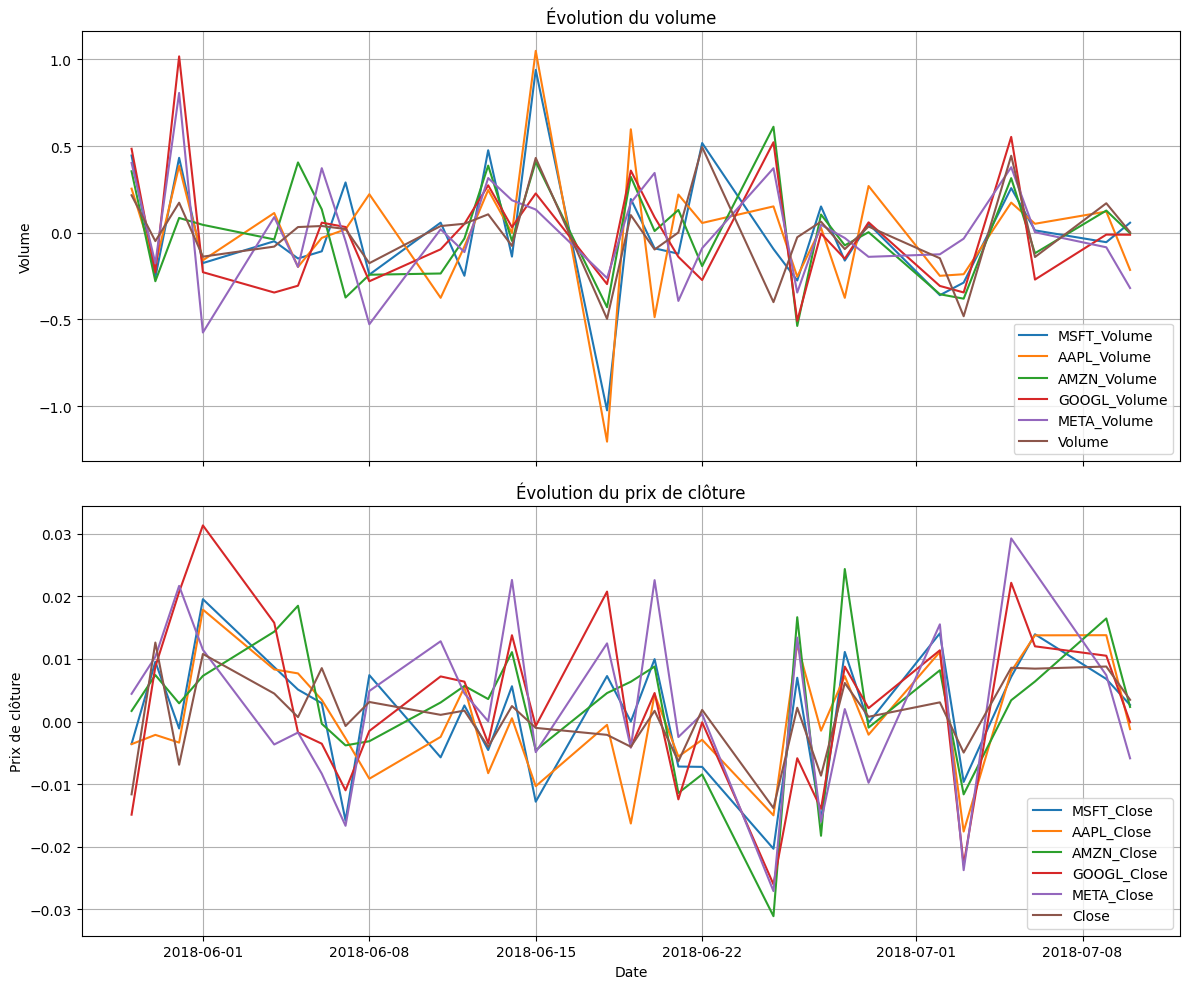

In [49]:
# Sélectionner les colonnes de volume et de close pour les entreprises spécifiées et le S&P 500
companies = ["MSFT", "AAPL", "AMZN", "GOOGL", "META"]
volume_columns = [f"{company}_Volume" for company in companies] + ['Volume'] # Ajouter la colonne 'Volume' du S&P 500
close_columns = [f"{company}_Close" for company in companies] + ['Close'] # Ajouter la colonne 'Close' du S&P 500

# Créer la figure et les sous-graphiques
fig, axes = plt.subplots(2, 1, figsize=(12, 10), sharex=True)  # 2 sous-graphiques, partageant l'axe des x

# Graphique du volume
for column in volume_columns:
    axes[0].plot(df.index[:30], df[column][:30], label=column)
    
axes[0].set_title("Évolution du volume")
axes[0].set_ylabel("Volume")
axes[0].legend()
axes[0].grid(True)

# Graphique du prix de clôture
for column in close_columns:
    # Utiliser merged_df pour accéder aux données
    axes[1].plot(df.index[:30], df[column][:30], label=column)
    
axes[1].set_title("Évolution du prix de clôture")
axes[1].set_xlabel("Date")
axes[1].set_ylabel("Prix de clôture")
axes[1].legend()
axes[1].grid(True)

# Ajuster l'espacement
plt.tight_layout()
plt.show()

### Ajout de lags temporels

In [52]:
df_lag = df.loc[:,['Close', 'Volume','vix','yield', 'MSFT_Close', 'AAPL_Close', 
                  'AMZN_Close', 'GOOGL_Close',
                  'META_Close','RSI', 'MACD',
                  'Signal_Line', 'Histogram', 'MA_20', 'MA_50', 'MA_100']]


# Liste des colonnes pour lesquelles on souhaite créer des lags
columns_to_lag = ['Close', 'Volume', 'MSFT_Close', 'AAPL_Close', 
                  'AMZN_Close', 'GOOGL_Close',
                  'META_Close','RSI', 'MACD',
                  'Signal_Line', 'Histogram', 'MA_20', 'MA_50', 'MA_100']

# Nombre de lags souhaités
n_lags = 3

# Ajouter les colonnes de lags
for col in columns_to_lag:
    for lag in range(1, n_lags + 1):
        df_lag[f'{col}_lag_{lag}'] = df_lag[col].shift(lag)

df_lag = df_lag.iloc[3:,:]

# Vérifier les nouvelles colonnes
df_lag.head()

,Close,Volume,vix,yield,MSFT_Close,AAPL_Close,AMZN_Close,GOOGL_Close,META_Close,RSI,...,Histogram_lag_3,MA_20_lag_1,MA_20_lag_2,MA_20_lag_3,MA_50_lag_1,MA_50_lag_2,MA_50_lag_3,MA_100_lag_1,MA_100_lag_2,MA_100_lag_3
Date,,,,,,,,,,,,,,,,,,,,,
2018-06-01,0.010791,-0.138029,-0.136591,0.025539,0.019537,0.017873,0.007288,0.031322,0.011458,53.510500,...,-0.001120,0.001303,0.001287,0.000783,-0.000086,0.000082,-0.000457,-0.000139,7.349314e-08,-8.587983e-05
2018-06-04,0.004470,-0.080055,-0.054976,0.014404,0.008693,0.008323,0.014352,0.015769,-0.003667,51.329406,...,0.000079,0.001956,0.001303,0.001287,0.000167,-0.000086,0.000082,-0.000048,-1.390513e-04,7.349314e-08
2018-06-05,0.000702,0.032730,-0.027050,-0.006148,0.005102,0.007686,0.018492,-0.001753,-0.001761,52.890550,...,-0.000418,0.001543,0.001956,0.001303,0.000766,0.000167,-0.000086,-0.000016,-4.775294e-05,-1.390513e-04
2018-06-06,0.008531,0.038753,-0.063249,0.019003,0.002931,0.003460,-0.000354,-0.003542,-0.008327,51.751903,...,0.000423,0.001405,0.001543,0.001956,0.001204,0.000766,0.000167,0.000002,-1.607782e-05,-4.775294e-05
2018-06-07,-0.000714,0.021419,0.041234,-0.014218,-0.015834,-0.002684,-0.003811,-0.010985,-0.016653,50.053647,...,0.000525,0.001845,0.001405,0.001543,0.000838,0.001204,0.000766,0.000017,2.074096e-06,-1.607782e-05


### Identification des variables clées

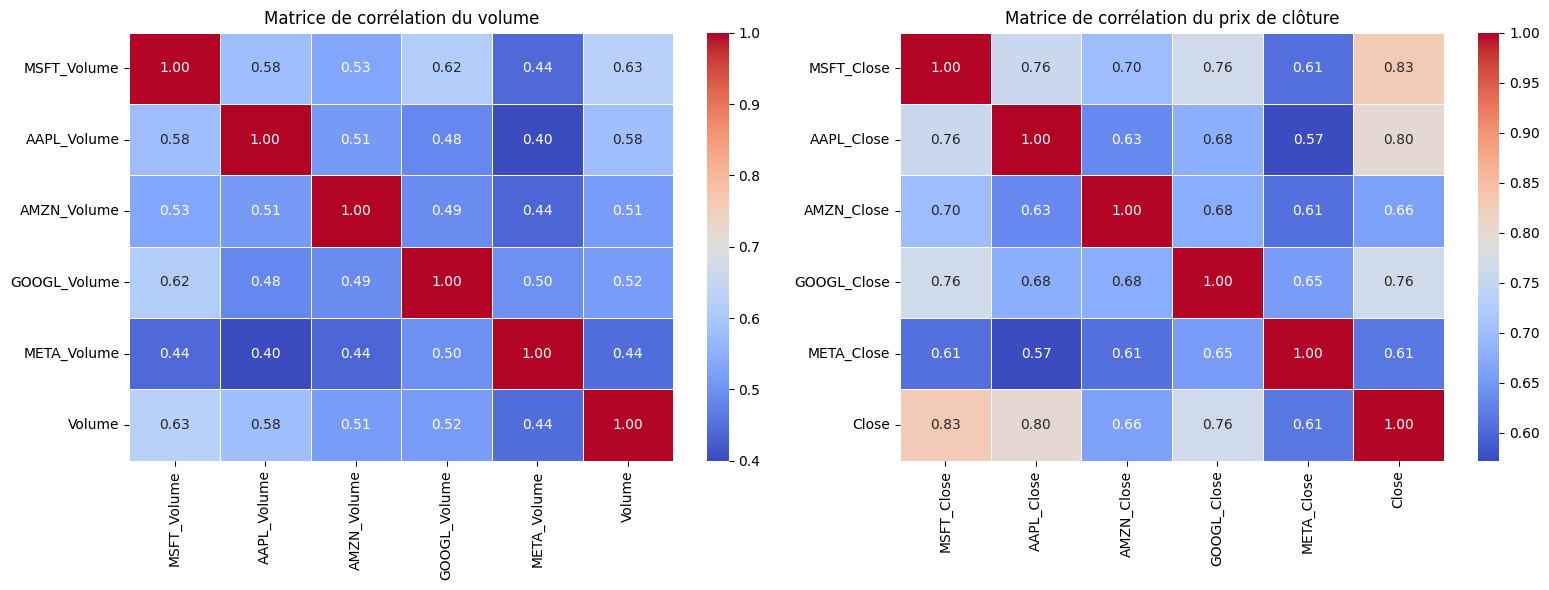

In [53]:
# Sélectionner les colonnes de volume et de close pour les entreprises spécifiées et le S&P 500
companies = ["MSFT", "AAPL", "AMZN", "GOOGL", "META"]
volume_columns = [f"{company}_Volume" for company in companies] + ['Volume']
close_columns = [f"{company}_Close" for company in companies] + ['Close']

# Créer la matrice de corrélation du volume
volume_data = df[volume_columns]
volume_correlation_matrix = volume_data.corr()

# Créer la matrice de corrélation du prix de clôture
close_data = df[close_columns]
close_correlation_matrix = close_data.corr()

# Afficher les matrices de corrélation avec Seaborn
fig, axes = plt.subplots(1, 2, figsize=(16, 6))  # 2 sous-graphiques côte à côte

# Matrice de corrélation du volume
sns.heatmap(volume_correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5, ax=axes[0])
axes[0].set_title("Matrice de corrélation du volume")

# Matrice de corrélation du prix de clôture
sns.heatmap(close_correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5, ax=axes[1])
axes[1].set_title("Matrice de corrélation du prix de clôture")

plt.tight_layout()
plt.show()

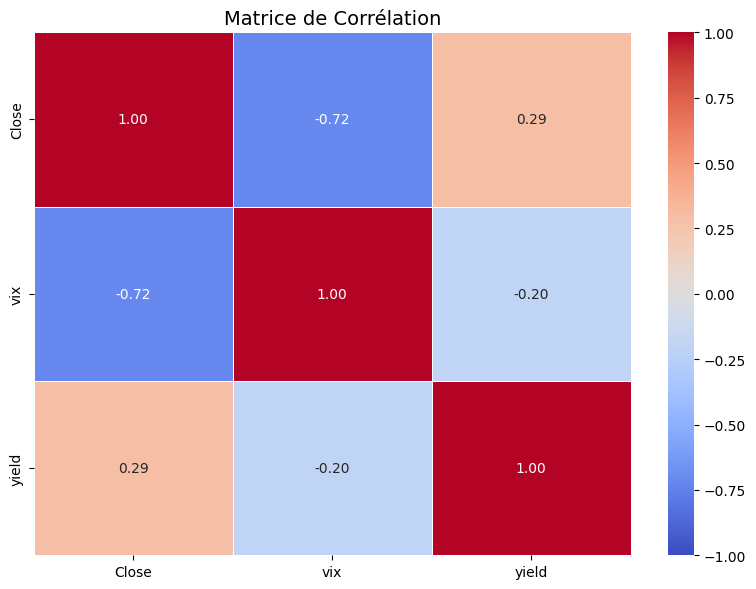

In [54]:
columns_to_correlate = ['Close', 'vix','yield']

# Calcul de la matrice de corrélation
correlation_matrix = df_lag[columns_to_correlate].corr()

# Affichage avec seaborn
plt.figure(figsize=(8, 6))  # Taille de la figure

# Matrice de corrélation du prix de clôture et ses lags
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5, vmin=-1, vmax=1)

# Ajouter un titre
plt.title('Matrice de Corrélation', fontsize=14)

# Affichage du graphique
plt.tight_layout()
plt.show()

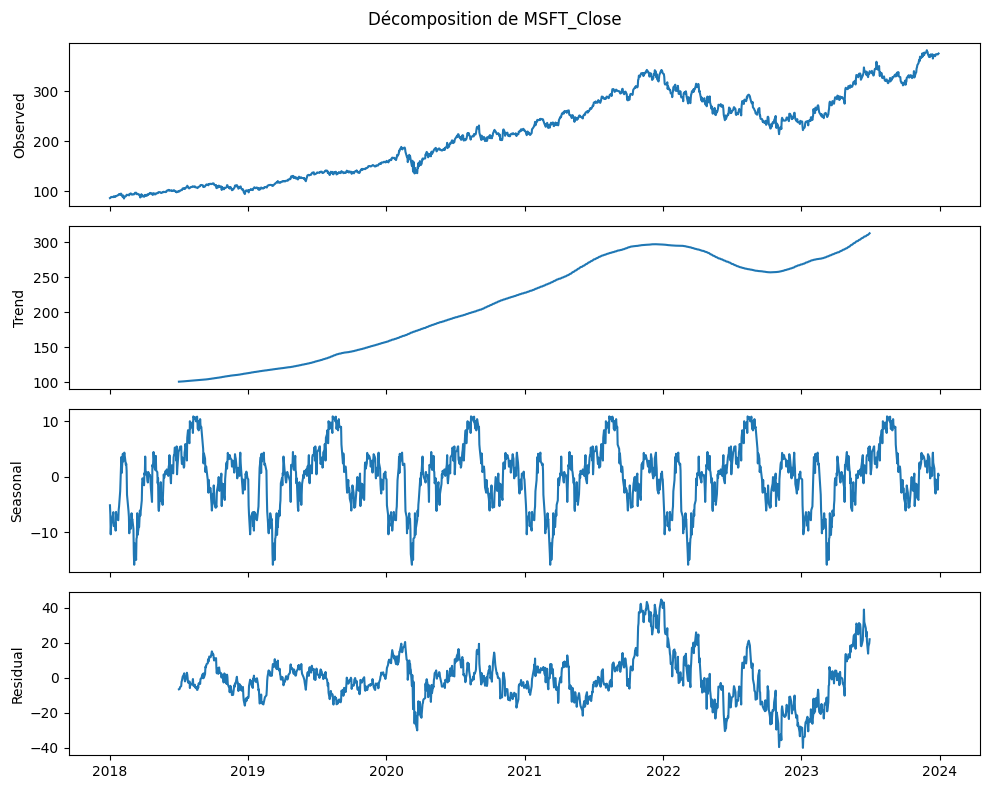

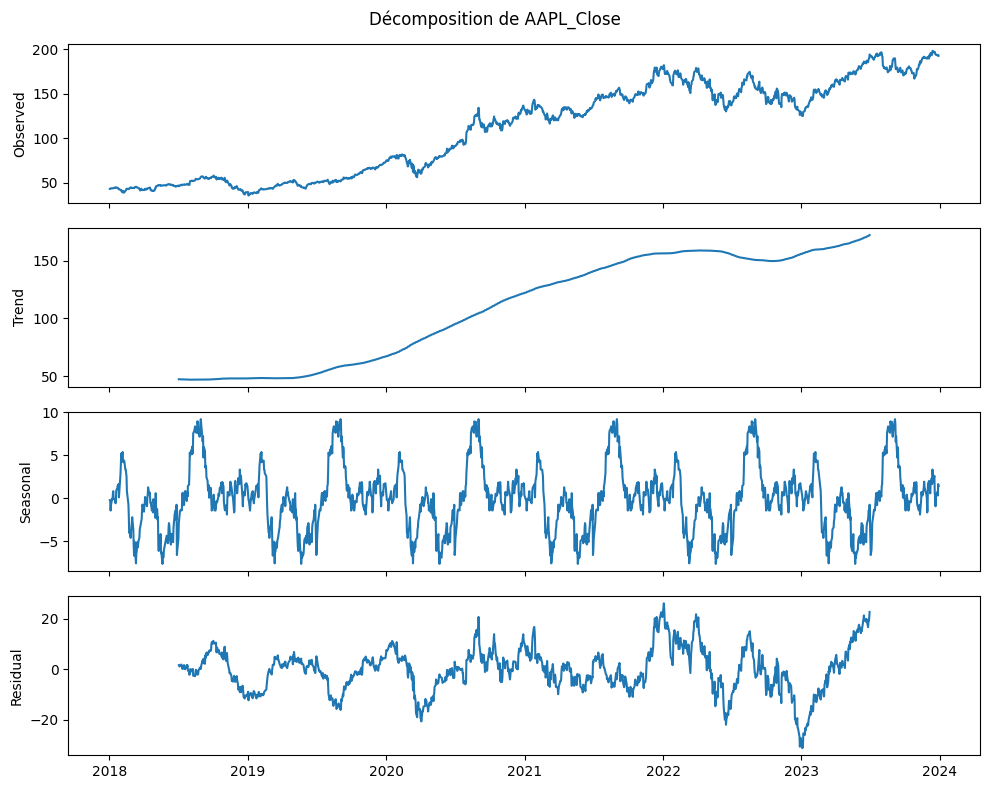

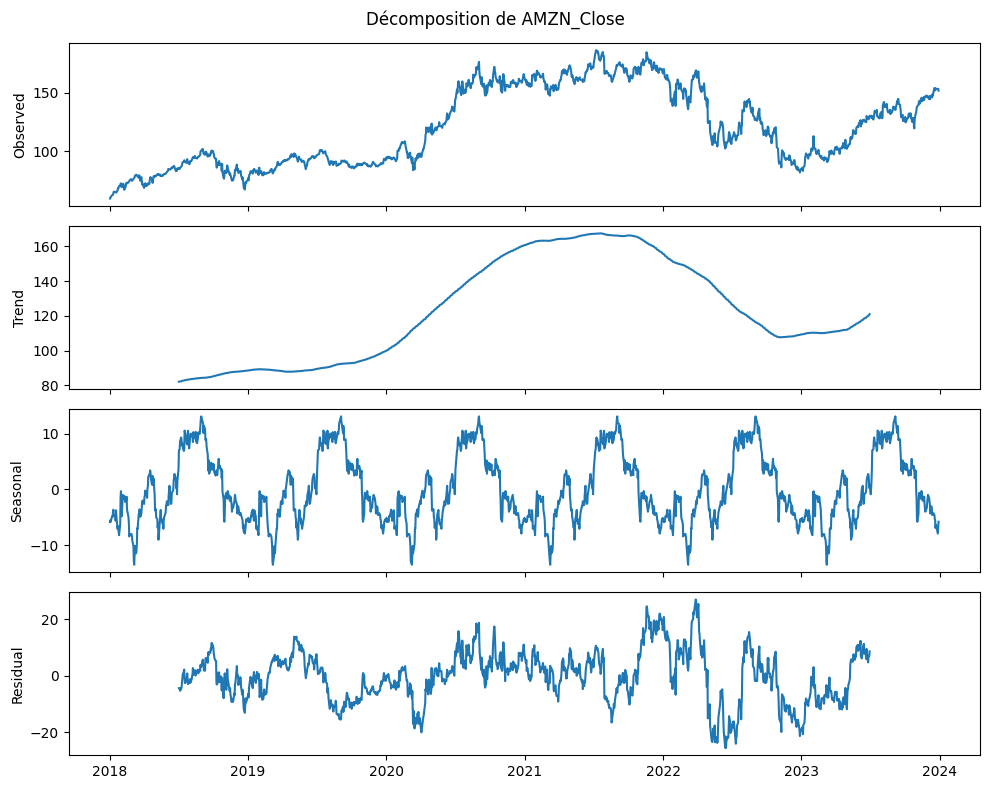

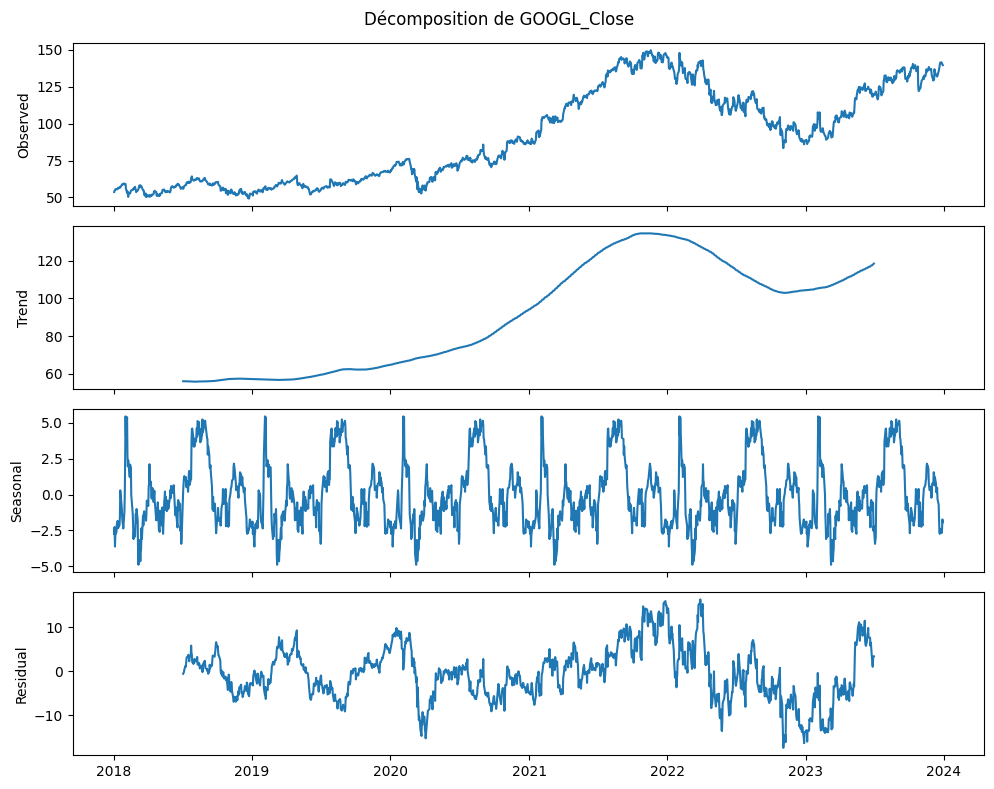

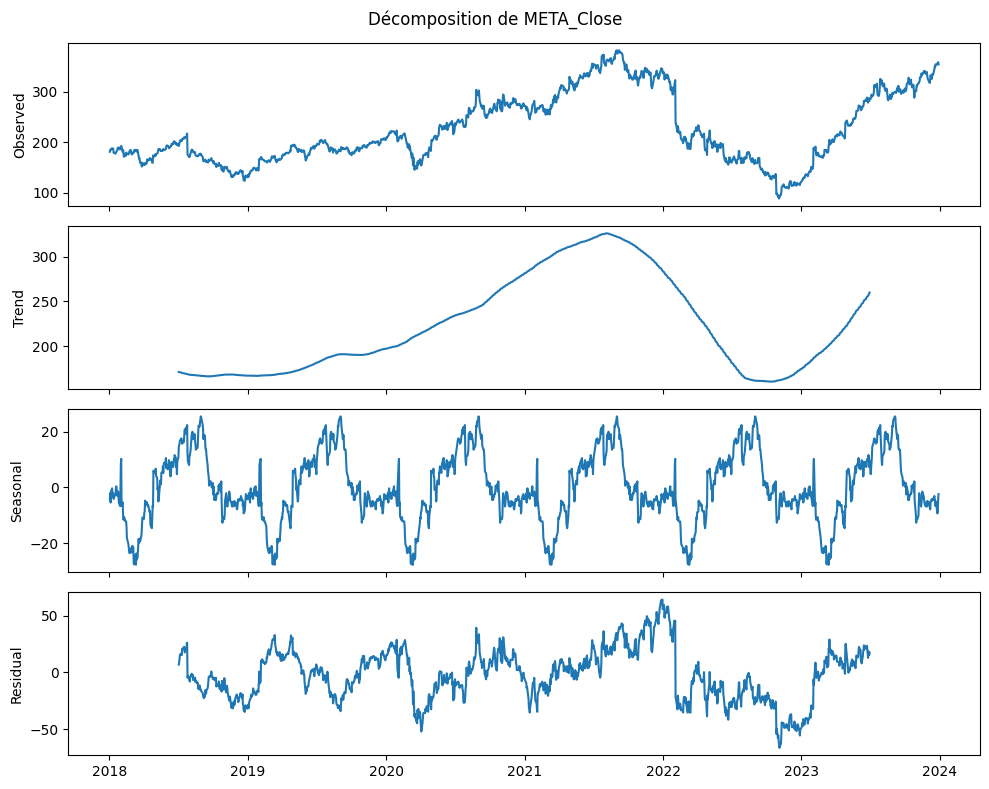

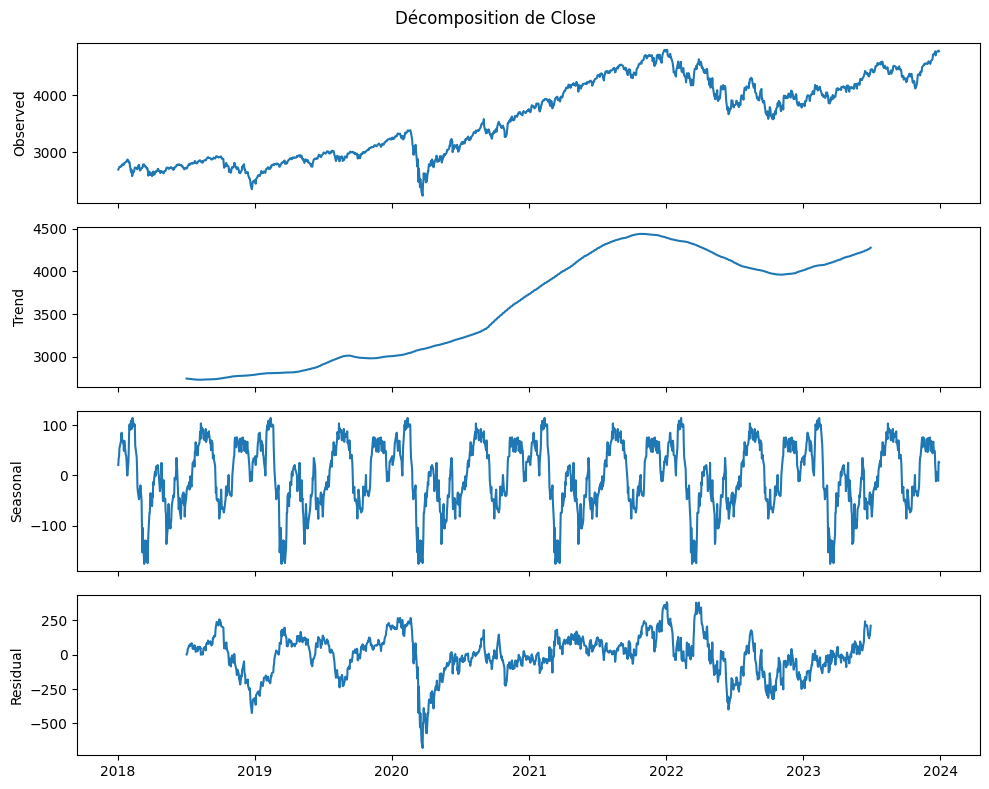

In [55]:
# Sélectionner les colonnes de prix de clôture pour les entreprises spécifiées et le S&P 500
companies = ["MSFT", "AAPL", "AMZN", "GOOGL", "META"]
close_columns = [f"{company}_Close" for company in companies] + ['Close']

# Décomposer les séries temporelles pour chaque colonne
for column in close_columns:
    # Obtenir la série temporelle
    time_series = merged_df[column]

    # Décomposer la série temporelle
    decomposition = sm.tsa.seasonal_decompose(time_series, model='additive', period=252) # Période de 252 jours (environ 1 année boursière)

    # Afficher les composantes
    fig, axes = plt.subplots(4, 1, figsize=(10, 8), sharex=True)
    axes[0].plot(decomposition.observed)
    axes[0].set_ylabel('Observed')
    axes[1].plot(decomposition.trend)
    axes[1].set_ylabel('Trend')
    axes[2].plot(decomposition.seasonal)
    axes[2].set_ylabel('Seasonal')
    axes[3].plot(decomposition.resid)
    axes[3].set_ylabel('Residual')
    fig.suptitle(f"Décomposition de {column}")
    plt.tight_layout()
    plt.show()



### Tests ADF

In [56]:
# Tester la stationnarité pour chaque colonne
for column in close_columns:
    # Obtenir la série temporelle résiduelle
    time_series = df[column]
    decomposition = sm.tsa.seasonal_decompose(time_series, model='additive', period=252)
    residuals = decomposition.resid.dropna()  # Supprimer les valeurs manquantes

    # Appliquer le test ADF
    adf_test = adfuller(residuals)

    # Résultats du test
    print(f"Test ADF pour la composante résiduelle de {column}:")
    print(f"Statistique ADF : {adf_test[0]}")
    print(f"p-value : {adf_test[1]}")
    print(f"Nombre de décalages utilisés : {adf_test[2]}")
    print(f"Nombres d'observations : {adf_test[3]}")
    print("Valeurs critiques :")
    for key, value in adf_test[4].items():
        print(f"   {key}: {value}")
    print("\n---\n")


Test ADF pour la composante résiduelle de MSFT_Close:
Statistique ADF : -11.710641456236695
p-value : 1.4918833681441684e-21
Nombre de décalages utilisés : 10
Nombres d'observations : 1145
Valeurs critiques :
   1%: -3.4360740356772745
   5%: -2.864067535683479
   10%: -2.5681157233843748

---

Test ADF pour la composante résiduelle de AAPL_Close:
Statistique ADF : -10.888837091064103
p-value : 1.2399801529471494e-19
Nombre de décalages utilisés : 8
Nombres d'observations : 1147
Valeurs critiques :
   1%: -3.436064032324827
   5%: -2.864063122757945
   10%: -2.5681133731450605

---

Test ADF pour la composante résiduelle de AMZN_Close:
Statistique ADF : -9.432224153416826
p-value : 5.153411363948256e-16
Nombre de décalages utilisés : 14
Nombres d'observations : 1141
Valeurs critiques :
   1%: -3.4360941478268767
   5%: -2.864076408006588
   10%: -2.568120448620112

---

Test ADF pour la composante résiduelle de GOOGL_Close:
Statistique ADF : -8.759782072128518
p-value : 2.6936653029039

In [61]:
# ##Sauvegarde des tables en local

# df.to_csv(r'C:\Users\ludo1\OneDrive\Bureau\df.csv', index=False )

# df_lag.to_csv(r'C:\Users\ludo1\OneDrive\Bureau\df_lag.csv', index=False )

## Partie 2: développement du model prédictif

In [57]:
from sklearn.model_selection import train_test_split

In [62]:
# utilisation de la table avec les lags en local

df = pd.read_csv('df_lag.csv')
df.head()

,Close,Volume,vix,yield,MSFT_Close,AAPL_Close,AMZN_Close,GOOGL_Close,META_Close,RSI,...,Histogram_lag_3,MA_20_lag_1,MA_20_lag_2,MA_20_lag_3,MA_50_lag_1,MA_50_lag_2,MA_50_lag_3,MA_100_lag_1,MA_100_lag_2,MA_100_lag_3
0,0.010791,-0.138029,-0.136591,0.025539,0.019537,0.017873,0.007288,0.031322,0.011458,53.510500,...,-0.001120,0.001303,0.001287,0.000783,-0.000086,0.000082,-0.000457,-0.000139,7.349314e-08,-8.587983e-05
1,0.004470,-0.080055,-0.054976,0.014404,0.008693,0.008323,0.014352,0.015769,-0.003667,51.329406,...,0.000079,0.001956,0.001303,0.001287,0.000167,-0.000086,0.000082,-0.000048,-1.390513e-04,7.349314e-08
2,0.000702,0.032730,-0.027050,-0.006148,0.005102,0.007686,0.018492,-0.001753,-0.001761,52.890550,...,-0.000418,0.001543,0.001956,0.001303,0.000766,0.000167,-0.000086,-0.000016,-4.775294e-05,-1.390513e-04
3,0.008531,0.038753,-0.063249,0.019003,0.002931,0.003460,-0.000354,-0.003542,-0.008327,51.751903,...,0.000423,0.001405,0.001543,0.001956,0.001204,0.000766,0.000167,0.000002,-1.607782e-05,-4.775294e-05
4,-0.000714,0.021419,0.041234,-0.014218,-0.015834,-0.002684,-0.003811,-0.010985,-0.016653,50.053647,...,0.000525,0.001845,0.001405,0.001543,0.000838,0.001204,0.000766,0.000017,2.074096e-06,-1.607782e-05


### Séparation des données

In [63]:
df1 = df.iloc[3:,:]

# On vérifie si il y a des valeurs Nan
df1.isna().any().any()

df1.columns

Index(['Close', 'Volume', 'vix', 'yield', 'MSFT_Close', 'AAPL_Close',
       'AMZN_Close', 'GOOGL_Close', 'META_Close', 'RSI', 'MACD', 'Signal_Line',
       'Histogram', 'MA_20', 'MA_50', 'MA_100', 'Close_lag_1', 'Close_lag_2',
       'Close_lag_3', 'Volume_lag_1', 'Volume_lag_2', 'Volume_lag_3',
       'MSFT_Close_lag_1', 'MSFT_Close_lag_2', 'MSFT_Close_lag_3',
       'AAPL_Close_lag_1', 'AAPL_Close_lag_2', 'AAPL_Close_lag_3',
       'AMZN_Close_lag_1', 'AMZN_Close_lag_2', 'AMZN_Close_lag_3',
       'GOOGL_Close_lag_1', 'GOOGL_Close_lag_2', 'GOOGL_Close_lag_3',
       'META_Close_lag_1', 'META_Close_lag_2', 'META_Close_lag_3', 'RSI_lag_1',
       'RSI_lag_2', 'RSI_lag_3', 'MACD_lag_1', 'MACD_lag_2', 'MACD_lag_3',
       'Signal_Line_lag_1', 'Signal_Line_lag_2', 'Signal_Line_lag_3',
       'Histogram_lag_1', 'Histogram_lag_2', 'Histogram_lag_3', 'MA_20_lag_1',
       'MA_20_lag_2', 'MA_20_lag_3', 'MA_50_lag_1', 'MA_50_lag_2',
       'MA_50_lag_3', 'MA_100_lag_1', 'MA_100_lag_2', 'MA_10

In [110]:
y = df1['Close']
X = df1.drop(columns=['Close', 'Volume', 'MSFT_Close', 'AAPL_Close',
       'AMZN_Close', 'GOOGL_Close', 'META_Close', 'RSI', 'MACD', 'Signal_Line',
       'Histogram', 'MA_20', 'MA_50', 'MA_100','Volume_lag_1', 'Volume_lag_2', 'Volume_lag_3','RSI_lag_1',
       'RSI_lag_2', 'RSI_lag_3', 'MACD_lag_1', 'MACD_lag_2', 'MACD_lag_3',
       'Signal_Line_lag_1', 'Signal_Line_lag_2', 'Signal_Line_lag_3',
       'Histogram_lag_1', 'Histogram_lag_2', 'Histogram_lag_3', 'MA_20_lag_1',
       'MA_20_lag_2', 'MA_20_lag_3', 'MA_50_lag_1', 'MA_50_lag_2',
       'MA_50_lag_3', 'MA_100_lag_1', 'MA_100_lag_2', 'MA_100_lag_3']) # on enlève BRK qui contient des valeurs nulles

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [112]:
print(X.columns)

Index(['vix', 'yield', 'Close_lag_1', 'Close_lag_2', 'Close_lag_3',
       'MSFT_Close_lag_1', 'MSFT_Close_lag_2', 'MSFT_Close_lag_3',
       'AAPL_Close_lag_1', 'AAPL_Close_lag_2', 'AAPL_Close_lag_3',
       'AMZN_Close_lag_1', 'AMZN_Close_lag_2', 'AMZN_Close_lag_3',
       'GOOGL_Close_lag_1', 'GOOGL_Close_lag_2', 'GOOGL_Close_lag_3',
       'META_Close_lag_1', 'META_Close_lag_2', 'META_Close_lag_3'],
      dtype='object')


In [113]:
X_train.head()

,vix,yield,Close_lag_1,Close_lag_2,Close_lag_3,MSFT_Close_lag_1,MSFT_Close_lag_2,MSFT_Close_lag_3,AAPL_Close_lag_1,AAPL_Close_lag_2,AAPL_Close_lag_3,AMZN_Close_lag_1,AMZN_Close_lag_2,AMZN_Close_lag_3,GOOGL_Close_lag_1,GOOGL_Close_lag_2,GOOGL_Close_lag_3,META_Close_lag_1,META_Close_lag_2,META_Close_lag_3
480,-0.072254,0.027488,-0.005256,0.014607,0.013822,-0.024662,-0.002869,0.018095,-0.016342,0.000707,0.028461,-0.026406,-0.014300,0.004478,-0.030576,-0.004506,0.004263,-0.024785,-0.013614,0.026334
51,-0.104759,0.006237,-0.004014,-0.007139,-0.001443,-0.007274,-0.006128,0.001643,0.006436,-0.006484,0.007834,0.005235,-0.006457,0.006341,-0.003095,-0.009496,0.002478,-0.001166,-0.015578,-0.011350
158,-0.052843,0.006569,0.002220,0.010665,-0.005271,0.003517,0.028593,-0.007322,0.012143,0.020260,-0.015151,0.005491,0.034848,-0.014335,0.002757,0.032743,-0.012250,-0.009511,0.024191,0.010996
809,0.185944,0.011853,-0.007086,0.002617,0.001606,-0.005173,0.005958,0.010435,-0.006173,0.013457,0.001409,-0.017438,0.001523,-0.002889,-0.011987,0.004217,0.003881,-0.022373,0.009264,0.001460
1076,-0.035348,0.008771,0.006589,0.018175,-0.004103,0.001665,0.018931,-0.011035,-0.009664,0.009211,-0.008249,0.002623,0.026372,-0.011040,-0.009824,0.024416,-0.009690,0.010358,0.011601,-0.011165


In [114]:
y_train.head()

480     0.026237
51      0.006369
158     0.007563
809    -0.010807
1076    0.015156
Name: Close, dtype: float64

### Calcul des erreurs

In [115]:
def calculate_rmse(s1, s2):
    
    if len(s1) != len(s2):
        raise ValueError("Les deux séries doivent avoir la même longueur.")
    
    mse = np.mean((s1 - s2) ** 2)
    rmse = np.sqrt(mse)
    return rmse

In [116]:
def calculate_mae(s1, s2):

    if len(s1) != len(s2):
        raise ValueError("Les deux séries doivent avoir la même longueur.")
    
    mae = np.mean(np.abs(s1 - s2))
    return mae

### Regression linéaire

In [117]:
from sklearn.linear_model import LinearRegression

In [130]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [131]:
pred = model.predict (X_test)

In [133]:
max(pred)

0.024779235880555365

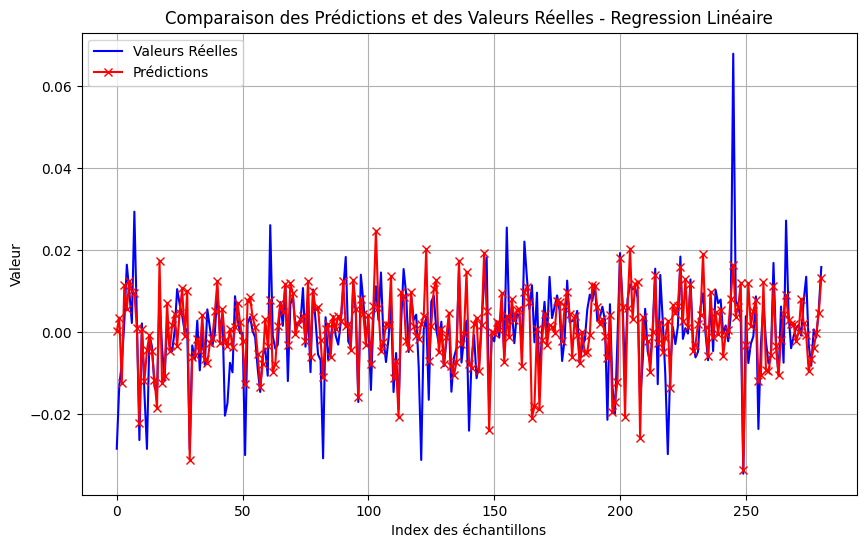

In [144]:
# Création du graphique
y = y_test.reset_index(drop=True)

plt.figure(figsize=(10, 6))

# Trace des valeurs réelles
plt.plot(y, label='Valeurs Réelles', color='blue')

# Trace des prédictions
plt.plot(pred, label='Prédictions', color='red', marker='x')

# Ajout des détails du graphique
plt.title('Comparaison des Prédictions et des Valeurs Réelles - Regression Linéaire')
plt.xlabel('Index des échantillons')
plt.ylabel('Valeur')
plt.legend()
plt.grid(True)

# Affichage du graphique
plt.show()


In [145]:
rmse = calculate_rmse (y,pred)
mae = calculate_mae (y,pred)
print (f'rmse : {round(rmse,6)}, mae : {round(mae,6)}')

rmse : 0.008502, mae : 0.005774


### Random forest

In [136]:
from sklearn.ensemble import RandomForestRegressor

In [204]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)  # n_estimators définit le nombre d'arbres

rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [205]:
pred_rf = rf_model.predict(X_test)

In [206]:
rmse = calculate_rmse (pred_rf,y)
mae = calculate_mae (pred_rf, y)
print (f'rmse : {round(rmse,6)}, mae : {round(mae,6)}')

rmse : 0.009365, mae : 0.007357


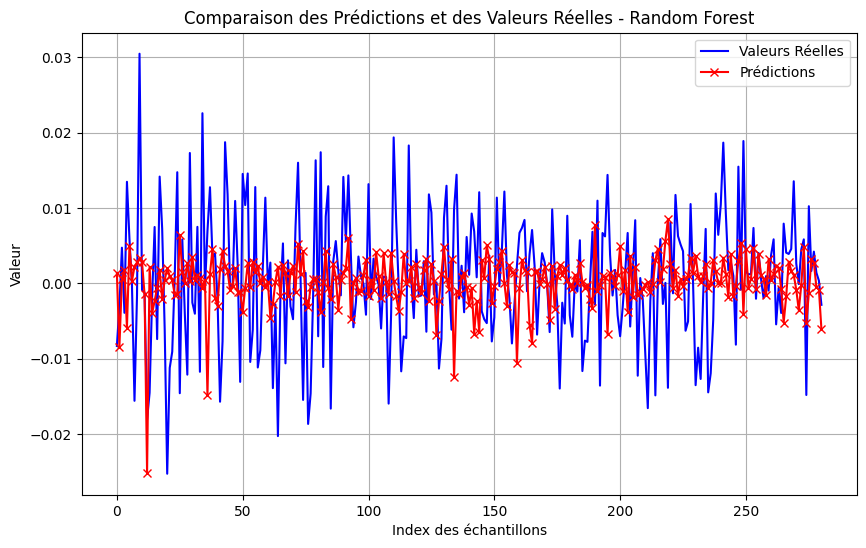

In [207]:
# Création du graphique
y = y_test.reset_index(drop=True)

plt.figure(figsize=(10, 6))

# Trace des valeurs réelles
plt.plot(y, label='Valeurs Réelles', color='blue')

# Trace des prédictions
plt.plot(pred_rf, label='Prédictions', color='red', marker='x')

# Ajout des détails du graphique
plt.title('Comparaison des Prédictions et des Valeurs Réelles - Random Forest')
plt.xlabel('Index des échantillons')
plt.ylabel('Valeur')
plt.legend()
plt.grid(True)

# Affichage du graphique
plt.show()


### ARIMA

In [151]:
from statsmodels.tsa.arima.model import ARIMA

C:\Users\ludo1\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


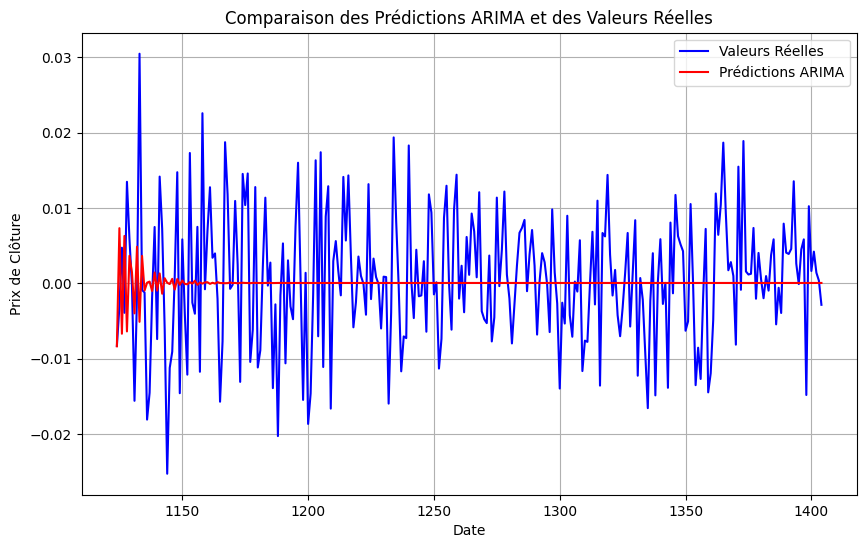

In [188]:
split = int(len(df1) * 0.8)
y_train = df1['Close'].iloc[:split]
y_test = df1['Close'].iloc[split:]

model = ARIMA(y_train, order=(9, 1, 7)) 
model_fit = model.fit()

#Prévisiosn
pred = model_fit.forecast(steps=len(y_test))

# Graphique de comparaison
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, label='Valeurs Réelles', color='blue')
plt.plot(y_test.index, pred, label='Prédictions ARIMA', color='red')
plt.title('Comparaison des Prédictions ARIMA et des Valeurs Réelles')
plt.xlabel('Date')
plt.ylabel('Prix de Clôture')
plt.legend()
plt.grid(True)
plt.show()

In [162]:
#hyperparamètres à optimiser
p = 5
d = 1
q = 0

In [163]:
# On utilise uniquement les valeurs passées du S&P 500

In [198]:
# point de séparation pour l'ensemble d'entrainement
split = int(len(df1)*0.8)

y_train = df1['Close'].iloc[:split]
y_test = df1['Close'].iloc[split:]

In [199]:
y_train.tail()

1119   -0.020997
1120    0.053953
1121    0.009198
1122   -0.008976
1123    0.008675
Name: Close, dtype: float64

In [200]:
model = ARIMA(y_train, order=(p, d, q))
model_fit = model.fit()

In [201]:
pred = model_fit.forecast(steps=len(y_test))
rmse = calculate_rmse (pred,y_test)
mae = calculate_mae (pred, y_test)
print (f'rmse : {round(rmse,6)}, mae : {round(mae,6)}')

rmse : 0.010714, mae : 0.008686


In [202]:
pred.head()

1124    0.000745
1125    0.015390
1126    0.006650
1127    0.004804
1128    0.007091
Name: predicted_mean, dtype: float64

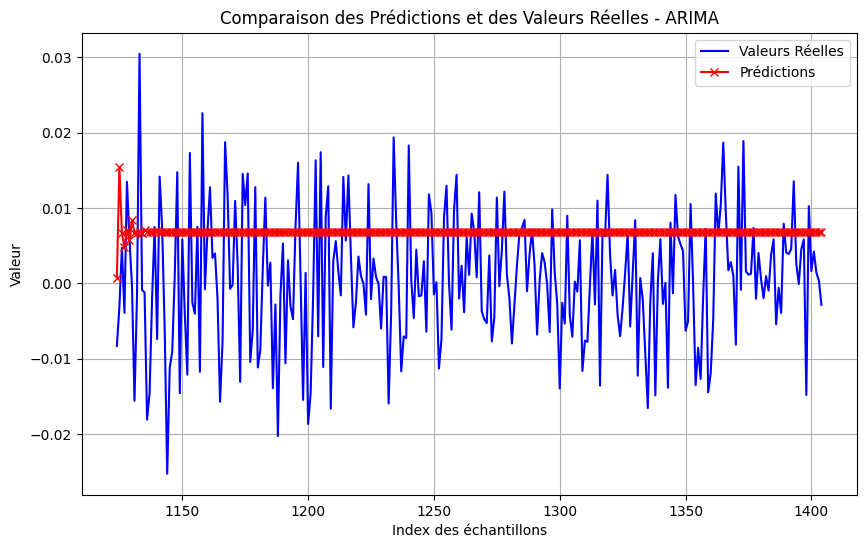

In [203]:
# Création du graphique
plt.figure(figsize=(10, 6))

# Trace des valeurs réelles
plt.plot(y_test, label='Valeurs Réelles', color='blue')

# Trace des prédictions
plt.plot(pred, label='Prédictions', color='red', marker='x')

# Ajout des détails du graphique
plt.title('Comparaison des Prédictions et des Valeurs Réelles - ARIMA')
plt.xlabel('Index des échantillons')
plt.ylabel('Valeur')
plt.legend()
plt.grid(True)

# Affichage du graphique
plt.show()


### Tests avec alpha vantage

In [32]:
!pip install alpha-vantage --upgrade --quiet # Installing package

In [34]:
from alpha_vantage.timeseries import TimeSeries
import pandas as pd

# Clé API Alpha Vantage
api_key = 'BPM6WSZQB5V14J2M'

# Initialiser l'objet TimeSeries
ts = TimeSeries(key=api_key, output_format='pandas')

# Récupérer une série de données économiques (Exemple : taux des fonds fédéraux de la Fed)
interest_rate_data, metadata = ts.get_intraday(symbol='IRX', interval='1min', outputsize='full')

# Convertir en DataFrame
interest_rate_data = interest_rate_data.rename(columns={"4. close": "Interest_Rate"})
interest_rate_data.reset_index(inplace=True)

# Afficher les premières lignes
interest_rate_data


ValueError: Invalid API call. Please retry or visit the documentation (https://www.alphavantage.co/documentation/) for TIME_SERIES_INTRADAY.

In [35]:
from alpha_vantage.timeseries import TimeSeries
import pandas as pd

# Clé API Alpha Vantage
api_key = 'BPM6WSZQB5V14J2M'

# Initialiser l'objet TimeSeries
ts = TimeSeries(key=api_key, output_format='pandas')

# Récupérer des données journalières pour un indicateur
# Exemple : taux directeur de la Fed
daily_interest_rate, metadata = ts.get_daily(symbol='FEDFUNDS', outputsize='compact')

# Renommer les colonnes pour plus de clarté
daily_interest_rate = daily_interest_rate.rename(columns={"4. close": "Interest_Rate"})
daily_interest_rate.reset_index(inplace=True)

# Vérifier les données
print(daily_interest_rate.head())


ValueError: Invalid API call. Please retry or visit the documentation (https://www.alphavantage.co/documentation/) for TIME_SERIES_DAILY.

In [25]:
from alpha_vantage.timeseries import TimeSeries

# Configurer l'API Alpha Vantage
api_key = 'BPM6WSZQB5V14J2M'
ts = TimeSeries(key=api_key, output_format='pandas')

# Exemple : Taux d'intérêt à court terme (remplacez par un vrai symbole économique si nécessaire)
interest_data, _ = ts.get_intraday(symbol='IRX', interval='1min', outputsize='full')
interest_data = interest_data[['4. close']].rename(columns={'4. close': 'Interest_Rate'})

# Réinitialiser l'index
interest_data.reset_index(inplace=True)


ValueError: Invalid API call. Please retry or visit the documentation (https://www.alphavantage.co/documentation/) for TIME_SERIES_INTRADAY.